In [78]:
#Data Preparation and Ensuring the data

In [79]:
import numpy as np
import pandas as pd

In [80]:
df=pd.read_csv("/content/tested.csv", sep=',')

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [84]:
df['Travelalone'] = np.where((df['SibSp']+df['Parch']) > 0, 0, 1).astype('uint8')

In [85]:
df1=df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

In [86]:
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
Fare,1
Embarked,0
Travelalone,0


In [87]:
df['Age'].fillna(df1['Age'].median(skipna=True), inplace=True)

In [88]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,3,male,34.5,7.8292,Q,1
1,1,3,female,47.0,7.0000,S,0
2,0,2,male,62.0,9.6875,Q,1
3,0,3,male,27.0,8.6625,S,1
4,1,3,female,22.0,12.2875,S,0


In [89]:
df_titanic=pd.get_dummies(df1, columns=['Pclass','Embarked', 'Sex'], drop_first=True)

In [90]:
df_titanic.head()

,Survived,Age,Fare,Travelalone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,34.5,7.8292,1,False,True,True,False,True
1,1,47.0,7.0000,0,False,True,False,True,False
2,0,62.0,9.6875,1,True,False,True,False,True
3,0,27.0,8.6625,1,False,True,False,True,True
4,1,22.0,12.2875,0,False,True,False,True,False


In [91]:
X=df_titanic.drop(['Survived'], axis=1)
Y=df_titanic['Survived']

In [92]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [93]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [94]:
df_MM=trans_MM.fit_transform(X)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.452723,0.015282,1.0,0.0,1.0,1.0,0.0,1.0
1,0.617566,0.013663,0.0,0.0,1.0,0.0,1.0,0.0
2,0.815377,0.018909,1.0,1.0,0.0,1.0,0.0,1.0
3,0.353818,0.016908,1.0,0.0,1.0,0.0,1.0,1.0
4,0.287881,0.023984,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
413,NaN,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
414,0.512066,0.212559,1.0,0.0,0.0,0.0,0.0,0.0
415,0.505473,0.014151,1.0,0.0,1.0,0.0,1.0,1.0
416,NaN,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [95]:
df_SS = trans_SS.fit_transform(X)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7
0,0.298549,-0.497811,0.807573,-0.534933,0.957826,2.843757,-1.350676,0.755929
1,1.181328,-0.512660,-1.238278,-0.534933,0.957826,-0.351647,0.740370,-1.322876
2,2.240662,-0.464532,0.807573,1.869391,-1.044031,2.843757,-1.350676,0.755929
3,-0.231118,-0.482888,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929
4,-0.584229,-0.417971,-1.238278,-0.534933,0.957826,-0.351647,0.740370,-1.322876
...,...,...,...,...,...,...,...,...
413,NaN,-0.493856,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929
414,0.616350,1.312180,0.807573,-0.534933,-1.044031,-0.351647,-1.350676,-1.322876
415,0.581038,-0.508183,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929
416,NaN,-0.493856,0.807573,-0.534933,0.957826,-0.351647,0.740370,0.755929


In [96]:
#Linear Regression

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [98]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [99]:
#Read the given CSV file, and view some sample records
advertising = pd.read_csv( "/content/advertising.csv" )
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


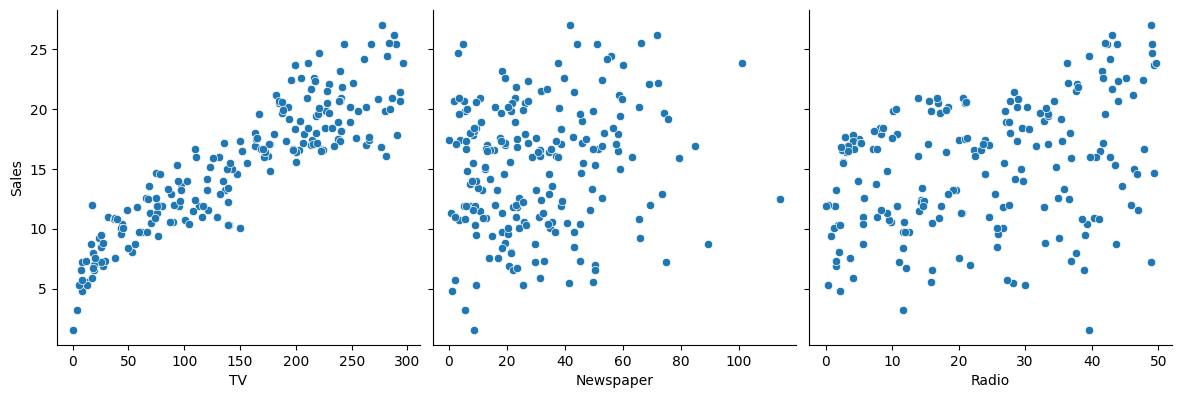

In [100]:
#Importing seaborn library for visualizations
#import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(advertising, x_vars= ['TV', 'Newspaper', 'Radio'], y_vars='Sales', size=4, kind='scatter')
plt.show()

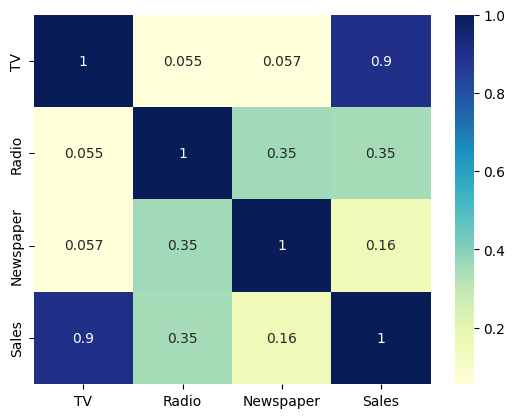

In [101]:
#To plot heatmap to find out correlations
sns.heatmap(advertising.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

In [102]:
X = advertising[ 'TV' ]
y = advertising[ 'Sales' ]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [104]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(140,)
(60,)
(140,)
(60,)


In [105]:
import statsmodels.api as sm

In [106]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [107]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

,0
const,6.948683
TV,0.054546


In [108]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           1.52e-52
Time:                        14:12:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [109]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [110]:
y_pred.head()

,0
126,7.374140
104,19.941482
99,14.323269
92,18.823294
111,20.132392


In [111]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# RMSE value
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# R-squared value
print("R-squared:", r2_score(y_test, y_pred))

RMSE: 2.019296008966232
R-squared: 0.792103160124566


In [112]:
#Linear Regression Again

In [113]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [114]:
# Get dataset
df_sal = pd.read_csv('/content/Salary.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [115]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


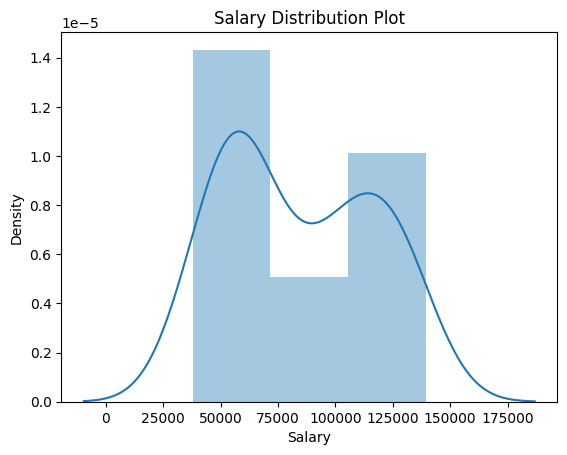

In [116]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

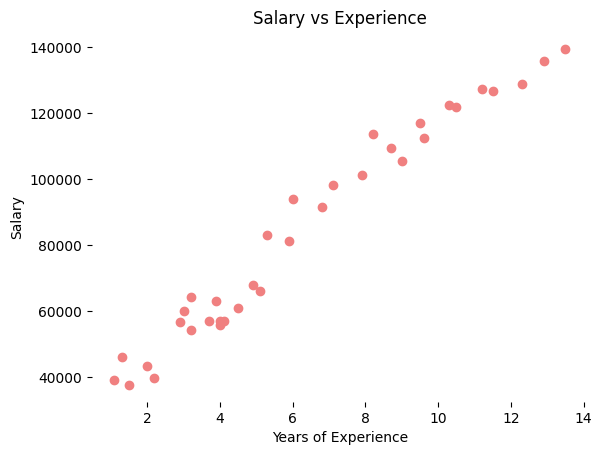

In [117]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [118]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [119]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [120]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [121]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

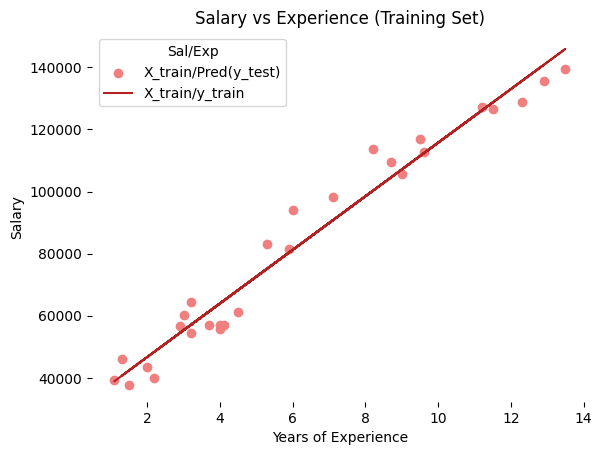

In [122]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

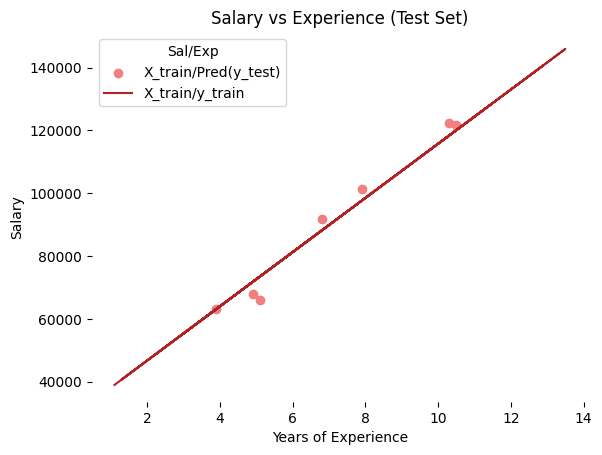

In [123]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [124]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[8629.79240044]]
Intercept: [29445.05652018]


In [125]:
#Multiple Linear Regression

In [126]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Sample Data
data={
    'Area': [1400, 1600, 1700, 1800, 1100],
    'Bedrooms': [3, 3, 2, 4, 2],
    'Age': [25, 15, 20, 10, 30],
    'Price': [245000, 312000, 280000, 303000, 200000]
}
df=pd.DataFrame(data)

X=df[['Area','Bedrooms','Age']]
Y=df['Price']
#Splitting
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#Create and train the model
model=LinearRegression()
model.fit(X_train,Y_train)

#Prediction
Y_pred=model.predict(X_test)

#Model Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 134. 5000.   40.]
Intercept: 41400.000000000146


In [127]:
#Logisic Regression

In [128]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/diabetes.csv", skiprows=1, names=col_names)

In [129]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [131]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [132]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [133]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 257.44, 'Predicted label')

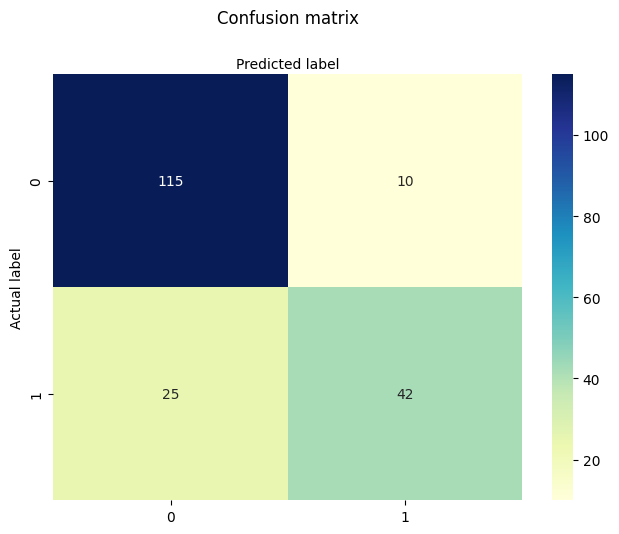

In [134]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Text class
from matplotlib.pyplot import Text

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label')

Confusion Matrix Evaluation

In [135]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



ROC Curve

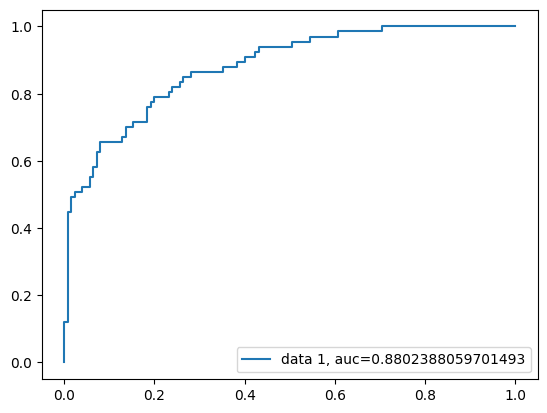

In [136]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

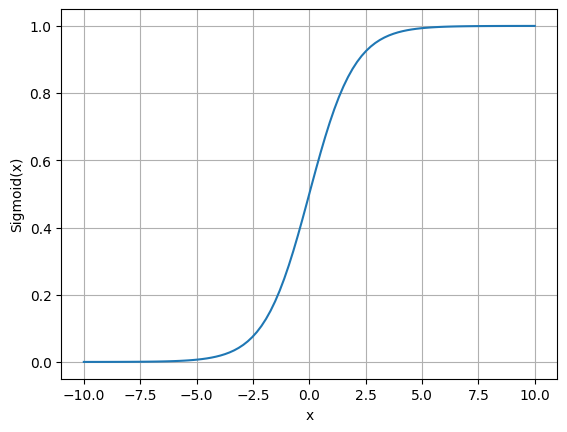

In [137]:
#Sigmoid Curve
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-x))

x=np.linspace(-10,10,100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid()
plt .show()

In [138]:
#Polynomial Regression

In [139]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/position-salaries data.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, 1:2].values
y= data_set.iloc[:, 2].values
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [140]:
#Fitting the Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_regs= LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

In [141]:
#Fitting the Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree= 2)
x_poly= poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

In [142]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

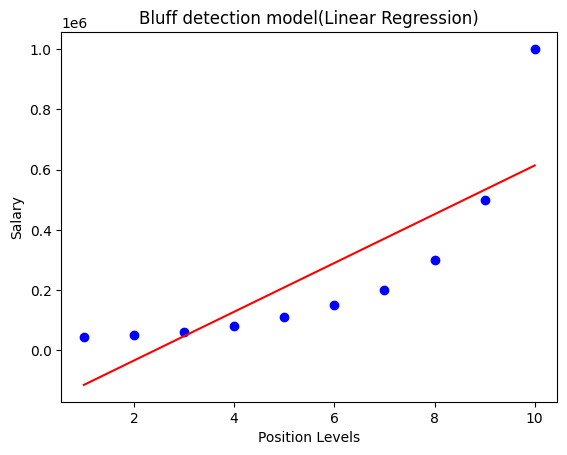

In [143]:
#Visulaizing the result for Linear Regression model
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_regs.predict(x), color="red")
mtp.title("Bluff detection model(Linear Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

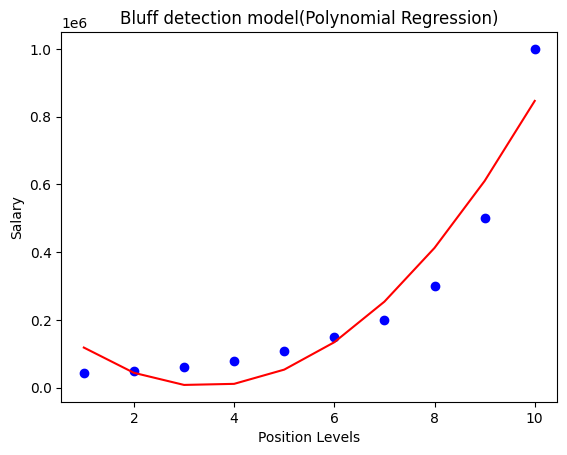

In [144]:
#Visulaizing the result for Polynomial Regression
mtp.scatter(x,y,color="blue")
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")
mtp.title("Bluff detection model(Polynomial Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

In [145]:
#Predicting the final result with the Linear Regression model:
lin_pred = lin_regs.predict([[6.5]])
print(lin_pred)

[330378.78787879]


In [146]:
#Predicting the final result with the Polynomial Regression model:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))
print(poly_pred)

[189498.10606061]


In [147]:
#Support Vector Regressor

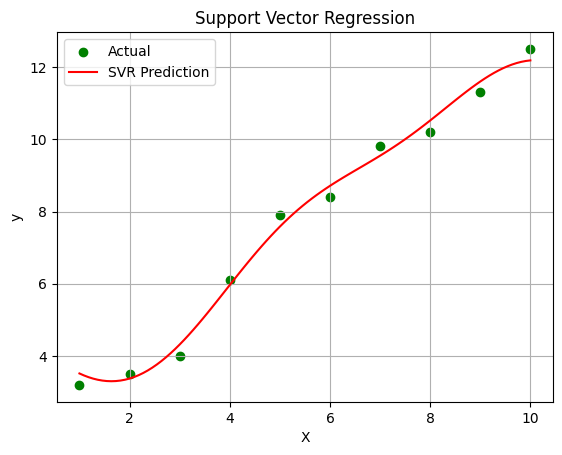

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#Generate synthetic data
X=np.arange(1,11).reshape(-1,1)
y=np.array([3.2, 3.5, 4.0, 6.1, 7.9, 8.4, 9.8, 10.2, 11.3, 12.5])

#Feature Scaling
sc_X=StandardScaler()
sc_y=StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1,1)).ravel()

#Train the svr model
svr_model=SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_scaled, y_scaled)

#Predict
X_test = np.linspace(1, 10, 100).reshape(-1,1)
X_test_scaled=sc_X.transform(X_test)
y_pred_scaled=svr_model.predict(X_test_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

#Plotting
plt.scatter(X, y, color='green', label='Actual')
plt.plot(X_test, y_pred, color='red', label='SVR Prediction')
plt.title('Support Vector Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
#Decision Tree Regression

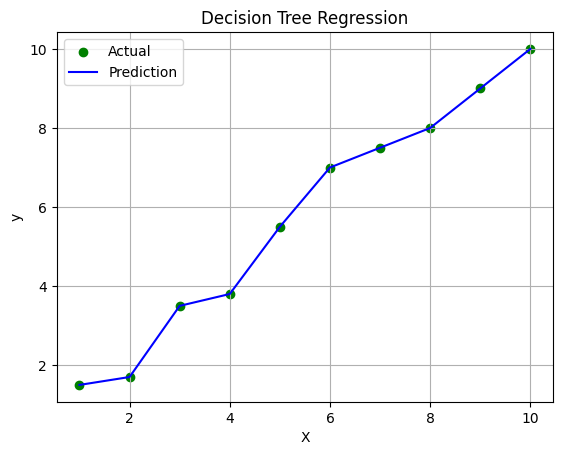

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([1.5,1.7,3.5,3.8,5.5,7.0,7.5,8.0,9.0,10.0])

regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

X_grid=np.arange(min(X),max(X)+0.1+0.01).reshape(-1,1)
y_pred=regressor.predict(X_grid)

plt.scatter(X,y,color='green',label='Actual')
plt.plot(X_grid,y_pred,color='blue',label='Prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
##Entropy and Information Gain
import numpy as np
import pandas as pd
from math import log2

#Entropy function
def entropy(labels):
  values, counts=np.unique(labels, return_counts=True)
  probs=counts/counts.sum()
  return - sum(p*log2(p) for p in probs)

#Information Gain Function
def info_gain(data, feature, target):
  total_entropy=entropy(data[target])
  values=data[feature].unique()
  weighted_entropy=0

  for value in values:
    subset=data[data[feature]==value]
    weight=len(subset)/len(data)
    weighted_entropy=weight*entropy(subset[target])

  return total_entropy - weighted_entropy

#Sample data
data=pd.DataFrame({
    'Weather':['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
    'PlayCricket':['No','No','Yes','Yes','Yes','No','Yes','Yes','Yes','Yes','No','Yes','Yes',"No"]
})

#Calculate entropy of target
print("Entropy of PlayTennis:",entropy(data['PlayCricket']))

#Information gain for weather
print("Information gain for weather:",info_gain(data, 'Weather', 'PlayCricket'))

Entropy of PlayTennis: 0.9402859586706311
Information gain for weather: 0.5935178892225352


In [152]:
#Random Forest Regression

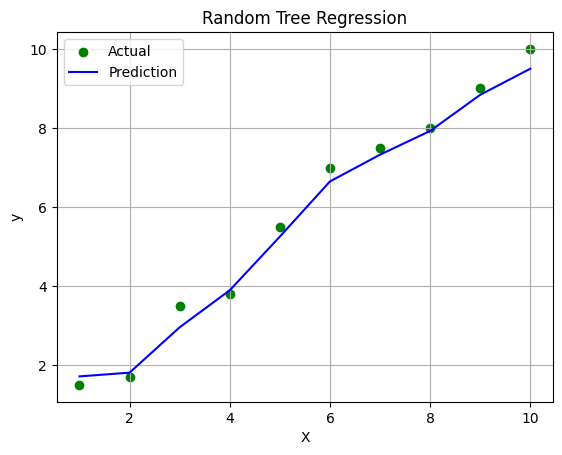

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([1.5,1.7,3.5,3.8,5.5,7.0,7.5,8.0,9.0,10.0])

rf_regressor=RandomForestRegressor(n_estimators=100,random_state=0)
rf_regressor.fit(X,y)

X_grid=np.arange(min(X),max(X)+0.1+0.01).reshape(-1,1)
y_pred=rf_regressor.predict(X_grid)

plt.scatter(X,y,color='green',label='Actual')
plt.plot(X_grid,y_pred,color='blue',label='Prediction')
plt.title('Random Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
#Naive Bayes Classification

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

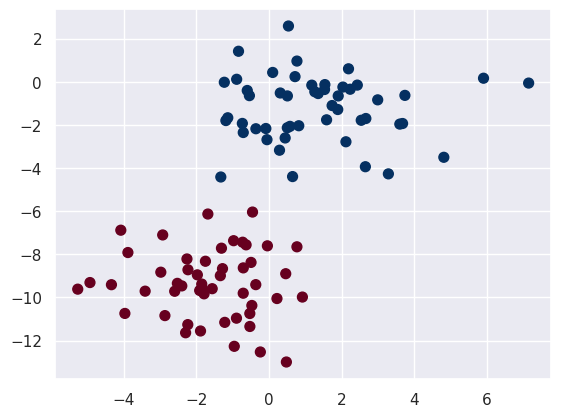

In [156]:
from sklearn.datasets import make_blobs
X, y= make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdBu')

In [157]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X, y)

GaussianNB()

In [158]:
rng=np.random.RandomState(0)
Xnew=[-6,-14]+[14, 18]*rng.rand(2000,2)
ynew=model.predict(Xnew)

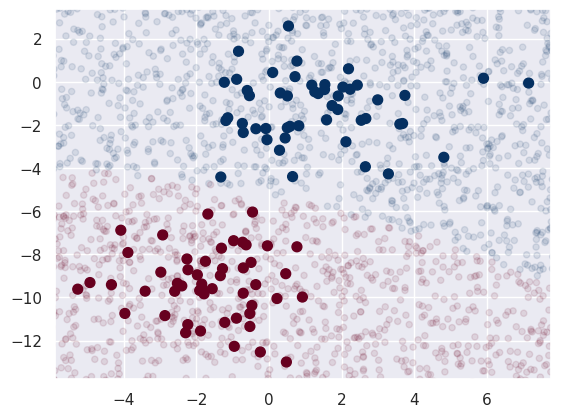

In [159]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu',alpha=0.1)
plt.axis(lim);

In [160]:
#Gradient Descent

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [162]:
bc=datasets.load_breast_cancer()
X=bc.data
y=bc.target

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [167]:
class CustomPerceptron(object):

  def __init__(self, n_iterations=100,random_state=1,learning_rate=0.01):
    self.n_iterations=n_iterations
    self.random_state=random_state
    self.learning_rate=learning_rate

  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      for _ in range(self.n_iterations):
          # Code for training the perceptron

         for xi, expected_value in zip(X, y):
            predicted_value=self.predict(xi)
            self.coef_[1:] += self.learning_rate * (expected_value - predicted_value) * xi
            self.coef_[0] += self.learning_rate * (expected_value - predicted_value) * 1


  def activation(self, X):
     return np.dot(X, self.coef_[1:]) + self.coef_[0]

  def predict(self, X):
     output = self.activation(X)
     return np.where(output >= 0.0, 1, 0)

  def score(self, X, y):
     misclassified_data_count=0
     for xi, target in zip(X, y):
        output = self.predict(xi)
        if(target != output):
          misclassified_data_count += 1
        total_data_count = len(X)
        self.score_ = (total_data_count - misclassified_data_count)/total_data_count
        return self.score_

In [165]:
n_iterations=100
learning_rate=0.01

In [168]:
prcptrn = CustomPerceptron()
prcptrn.fit(X_train, y_train)

In [169]:
print(prcptrn.score(X_test, y_test))
prcptrn.score(X_train, y_train)

0.9941520467836257


1.0

In [170]:
#KNN(K-Nearest Neighbors)

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [173]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [175]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [176]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df=pd.concat([df, gender], axis=1)

In [177]:
df.drop(['Gender'], axis=1, inplace=True)

In [178]:
X=df[['Age', 'EstimatedSalary', 'Male']]
y=df['Purchased']

In [179]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [180]:
scaled_features = scaler.transform(X)
scaled_features

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [181]:
df_feat=pd.DataFrame(scaled_features, columns=X.columns)
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2)

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [184]:
pred=knn.predict(X_test)

In [185]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, pred)

array([[41, 10],
       [ 5, 24]])

In [186]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        51
           1       0.71      0.83      0.76        29

    accuracy                           0.81        80
   macro avg       0.80      0.82      0.80        80
weighted avg       0.82      0.81      0.82        80



In [187]:
#Decision Tree Classification

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [190]:
df=pd.read_csv('/content/balance-scale.csv',sep=',')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X=df.drop('Class', axis=1)
y=df[['Class']]

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [194]:
clf_model=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3,min_samples_leaf=5)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [195]:
y_pred=clf_model.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  8 10]
 [ 0 62 18]
 [ 0 20 70]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.69      0.78      0.73        80
           R       0.71      0.78      0.74        90

    accuracy                           0.70       188
   macro avg       0.47      0.52      0.49       188
weighted avg       0.64      0.70      0.67       188



In [197]:
target=list(df['Class'].unique())
feature_names=list(X.columns)

In [198]:
from sklearn.tree import export_text
r=export_text(clf_model,feature_names=feature_names)
print(r)

|--- L-Weight <= 2.50
|   |--- R-Distance <= 1.50
|   |   |--- L-Distance <= 2.50
|   |   |   |--- class: R
|   |   |--- L-Distance >  2.50
|   |   |   |--- class: L
|   |--- R-Distance >  1.50
|   |   |--- R-Weight <= 2.50
|   |   |   |--- class: R
|   |   |--- R-Weight >  2.50
|   |   |   |--- class: R
|--- L-Weight >  2.50
|   |--- L-Distance <= 2.50
|   |   |--- R-Weight <= 2.50
|   |   |   |--- class: L
|   |   |--- R-Weight >  2.50
|   |   |   |--- class: R
|   |--- L-Distance >  2.50
|   |   |--- R-Distance <= 3.50
|   |   |   |--- class: L
|   |   |--- R-Distance >  3.50
|   |   |   |--- class: L



In [199]:
#Random Forest Regressor

In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score

In [201]:
datasets=pd.read_csv('/content/petrol_consumption.csv')
datasets.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [202]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [203]:
!pip install pandas
!pip install scikit-learn

In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [205]:
print(X.shape)
print(y.shape)

(625, 4)
(625, 1)


In [208]:
X=datasets.iloc[:, 0:4].values
y=datasets.iloc[:, 4].values

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [210]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [211]:
print(y_train[:10])

[471 554 628 631 524 561 610 865 635 574]


In [212]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [214]:
print('Train MAE',mean_absolute_error(y_train,regressor.predict(X_train)))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train,regressor.predict(X_train))))
print('R Square:',r2_score(y_train,regressor.predict(X_train)))

Train MAE 19.986842105263165
Train RMSE: 29.313285114611887
R Square: 0.9372445764892429


In [215]:
print('Train MAE:', mean_absolute_error(y_test,regressor.predict(X_test)))
print('Train RMSE:', np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))))
print('R Squared:', r2_score(y_test,regressor.predict(X_test)))

Train MAE: 68.44500000000002
Train RMSE: 81.58747606097398
R Squared: -0.13603283760905516


In [216]:
#SVM(Support Vector Machines) SVC

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report

In [218]:
df=pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [219]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Text(0.5, 1.0, 'Age-Cholesterol plot')

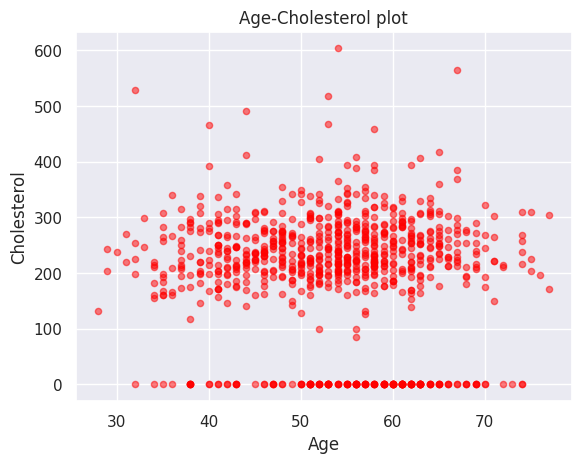

In [220]:
df.plot(kind='scatter',x='age',y='chol',alpha=0.5,color='red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol plot')

In [235]:
# Make a copy to avoid modifying the original dataframe
df_processed = df.copy()

# List all categorical columns that need one-hot encoding
categorical_cols_to_encode = ['cp', 'thal', 'sex', 'dataset', 'fbs', 'restecg', 'exang', 'slope']

# Apply one-hot encoding
df_new = pd.get_dummies(df_processed, columns=categorical_cols_to_encode, drop_first=True)

# Impute missing numerical values
# Identify numerical columns that might have NaNs
numerical_cols_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

for col in numerical_cols_to_impute:
    if col in df_new.columns: # Check if column still exists after get_dummies (e.g., 'ca' is a numeric column)
        # Impute with the median of the column
        df_new[col].fillna(df_new[col].median(), inplace=True)


In [236]:
X=df_new.drop('num',axis=1)
y=df_new.num

In [237]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [238]:
from sklearn.model_selection import GridSearchCV
ml=svm.SVC()
para_grid={'C' : [1,10,100,1000], 'gamma' :[1,0.1,0.01,0.001], 'kernel':['rbf']}
grid=GridSearchCV(ml,para_grid,refit=True,verbose=1,cv=5,n_jobs=-1)
grid_search=grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [232]:
print('X_train info:')
X_train.info()

X_train info:
<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 767 to 520
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      736 non-null    int64  
 1   age                     736 non-null    int64  
 2   trestbps                688 non-null    float64
 3   chol                    711 non-null    float64
 4   fbs                     665 non-null    object 
 5   restecg                 734 non-null    object 
 6   thalch                  692 non-null    float64
 7   exang                   692 non-null    object 
 8   oldpeak                 685 non-null    float64
 9   slope                   480 non-null    object 
 10  ca                      238 non-null    float64
 11  cp_atypical angina      736 non-null    bool   
 12  cp_non-anginal          736 non-null    bool   
 13  cp_typical angina       736 non-null    bool   
 14  thal_normal             736 non

In [233]:
print('\ny_train dtype:')
print(y_train.dtype)


y_train dtype:
int64


In [239]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [240]:
accuracy=grid_search.best_score_

In [241]:
accuracy

np.float64(0.5734418091560949)

In [242]:
y_test_hat=grid.predict(X_test)

Confusion Matrix:
 [[73  5  4  2  0]
 [26 29  4  0  0]
 [ 5 10  3  3  0]
 [11  2  2  2  0]
 [ 2  1  0  0  0]]


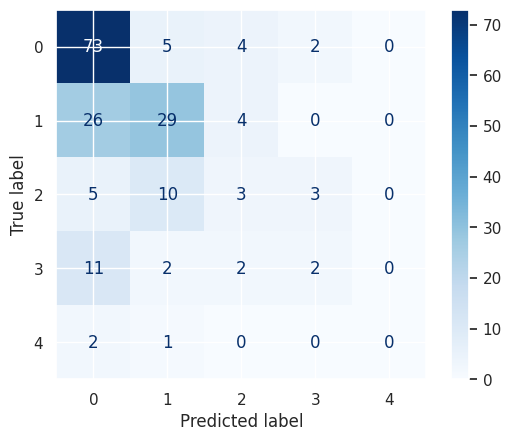

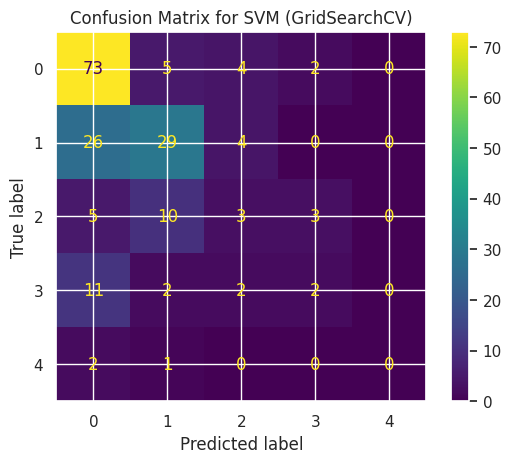

In [244]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_test_hat)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix using ConfusionMatrixDisplay from the fitted GridSearchCV object
disp = ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap=plt.cm.Blues)
disp.plot()
plt.title('Confusion Matrix for SVM (GridSearchCV)')
plt.show()

In [245]:
#XG Boost(Classfication)

In [246]:
from sklearn.datasets import load_iris
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Load the dataset
iris=load_iris()
X=iris.data
y=iris.target

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

#Create XGBoost Classifier
model=XGBClassifier(use_label_encoder=False, eval_metrics='mlogloss',n_estimator=100, max_depth=3, learning_rate=0.1)

#Train the model
model.fit(X_train, y_train)

#Prediction
y_pred=model.predict(X_test)

#Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [247]:
#Hierarchical Clustering

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [251]:
df1=df.iloc[:, 3:5].values

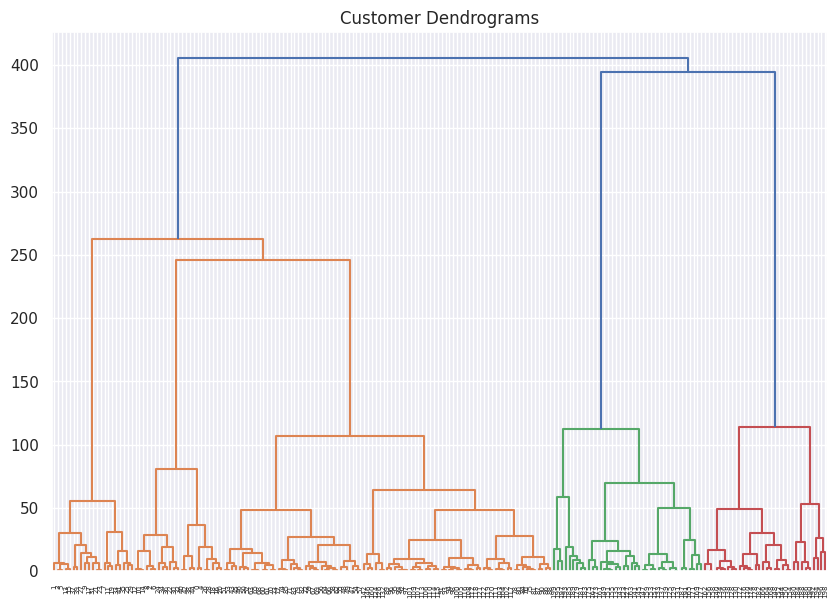

In [252]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df1,method='ward'))

In [254]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,metric='euclidean', linkage='ward')
lables_=model.fit_predict(df1)

In [255]:
lables_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

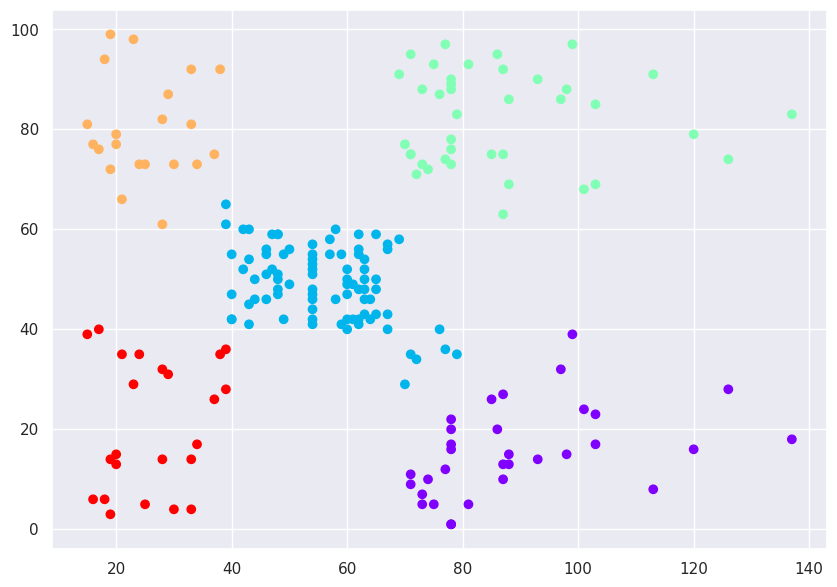

In [256]:
plt.figure(figsize=(10,7))
plt.scatter(df1[:,0], df1[:,1], c=model.labels_, cmap='rainbow')

In [257]:
#K-Means Clustering

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [259]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [260]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=model.fit_predict(df.iloc[:,[3,4]].values)

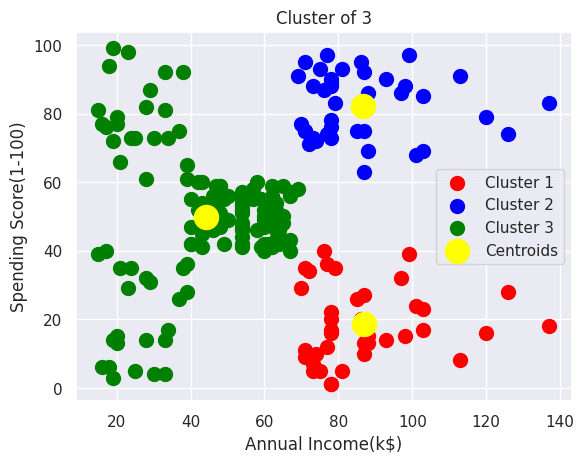

In [262]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# Fit the model to the data (using df1 from Mall Customers dataset)
model.fit(df1)

# Plot the clusters using df1
plt.scatter(df1[y_kmeans == 0,0], df1[y_kmeans ==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(df1[y_kmeans == 1,0], df1[y_kmeans ==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(df1[y_kmeans == 2,0], df1[y_kmeans ==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],s=300, c='yellow', label='Centroids')
plt.title('Cluster of 3')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

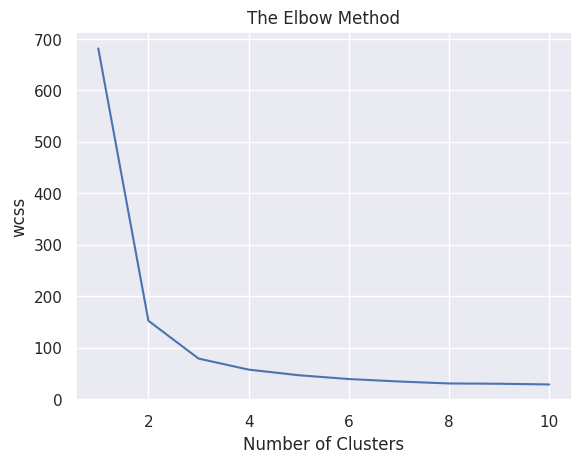

In [263]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [264]:
model=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=model.fit_predict(X)

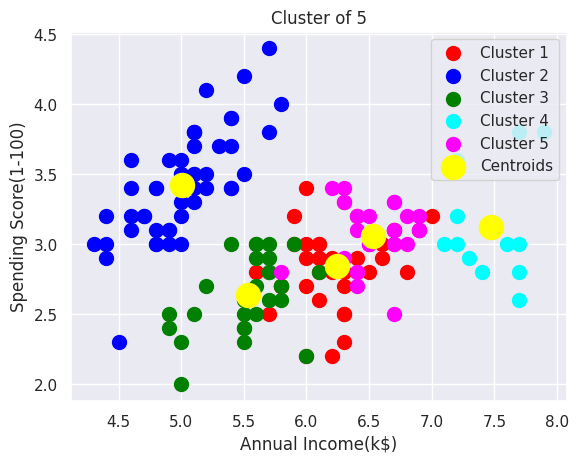

In [265]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans ==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans ==4,1], s=100, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],s=300, c='yellow', label='Centroids')
plt.title('Cluster of 5')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [266]:
#KNN for Anomaly Detection

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [268]:
data=pd.read_csv("http://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df=data[['sepal_length','sepal_width']]

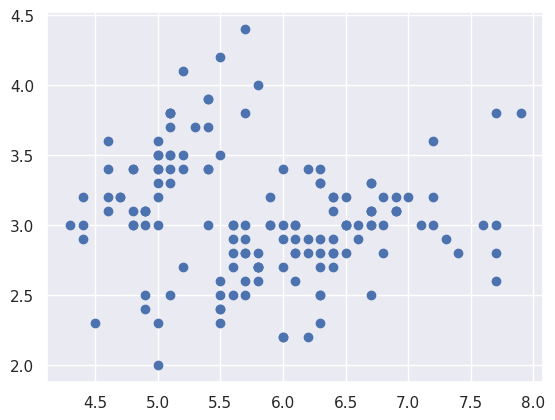

In [270]:
plt.scatter(df['sepal_length'], df['sepal_width'])

In [271]:
X=df.values
nbrs=NearestNeighbors(n_neighbors=3)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

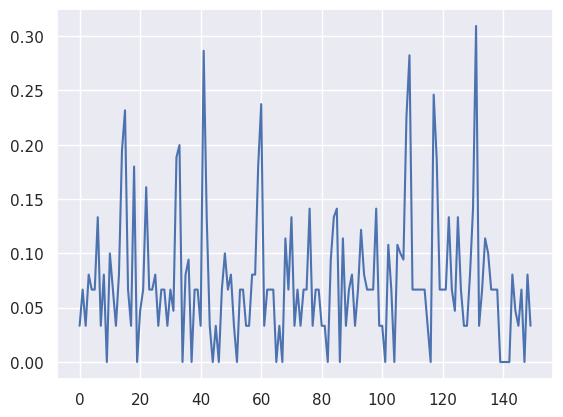

In [272]:
distances,indexes=nbrs.kneighbors(X)
plt.plot(distances.mean(axis=1))

In [273]:
outlier_index=np.where(distances.mean(axis=1)>0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [274]:
outlier_values=df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


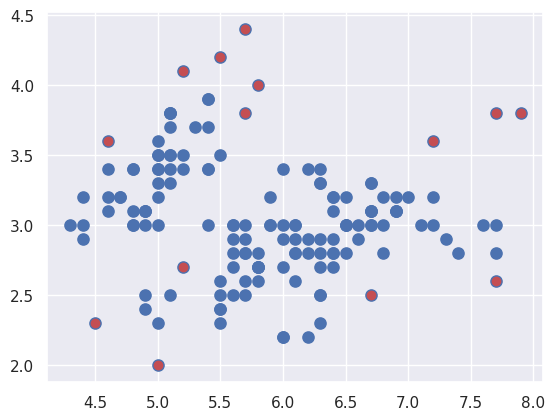

In [275]:
plt.scatter(df['sepal_length'],df['sepal_width'], color='b', s=65)
plt.scatter(outlier_values['sepal_length'], outlier_values['sepal_width'], color='r')

In [276]:
#SCIKIT LEARN

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline



In [278]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

ENSEMBLE LEARNING

In [279]:
#Bagging Demo

In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [281]:
url="http://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names=['preg','plas','skin','test','mass','pedi','age','class']
data=pd.read_csv(url, names=names)
data.head()

,preg,plas,skin,test,mass,pedi,age,class
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [282]:
aray=data.values
X=aray[:, 0:8]
y=aray[:, 7]

In [283]:
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100

In [285]:
model=BaggingClassifier(estimator=cart, n_estimators=num_trees,random_state=12)
results=cross_val_score(model, X, y, cv=kfold)
print(results.mean())

1.0


In [286]:
#Boosting Demo

In [287]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [288]:
df=pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y']=load_breast_cancer()['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [289]:
X,y=df.drop('y',axis=1),df.y
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index, val_index in kf.split(X):
  X_train, X_val=X.iloc[train_index], X.iloc[val_index],
  y_train, y_val=y.iloc[train_index], y.iloc[val_index],

In [290]:
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [291]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_val,gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        67

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



In [292]:
#Stacking Demo

In [293]:
import datetime

# Create a datetime object
dt_object = datetime.datetime.now()

# Print the date and time
print(dt_object)

2026-01-29 14:32:29.305436


In [294]:
!pip install vecstack

In [295]:
!pip install xgboost

In [296]:
from xgboost import XGBClassifier

In [297]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [298]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names=['Class','Alcohol','Malic acid','Ash',
       'Alcalinity of ash','Magnesium','Total phenols',
       'Flavonoids','Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wins',
       'Proline']

df=pd.read_csv(link,header=None,names=names)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wins,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [299]:
X=df.iloc[:,1:]
y=df[['Class']]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [300]:
models=[KNeighborsClassifier(n_neighbors=5, n_jobs=-1), RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=5),
        XGBClassifier(random_state=0,n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=5)]